+----+--------------------+--------------------+
| n  | Recursive Time (s) | Iterative Time (s) |
+----+--------------------+--------------------+
| 5  |     0.00001621     |     0.00000930     |
| 10 |     0.00003099     |     0.00000310     |
| 15 |     0.00003791     |     0.00000358     |
| 20 |     0.00006628     |     0.00000381     |
| 25 |     0.00009918     |     0.00000620     |
+----+--------------------+--------------------+


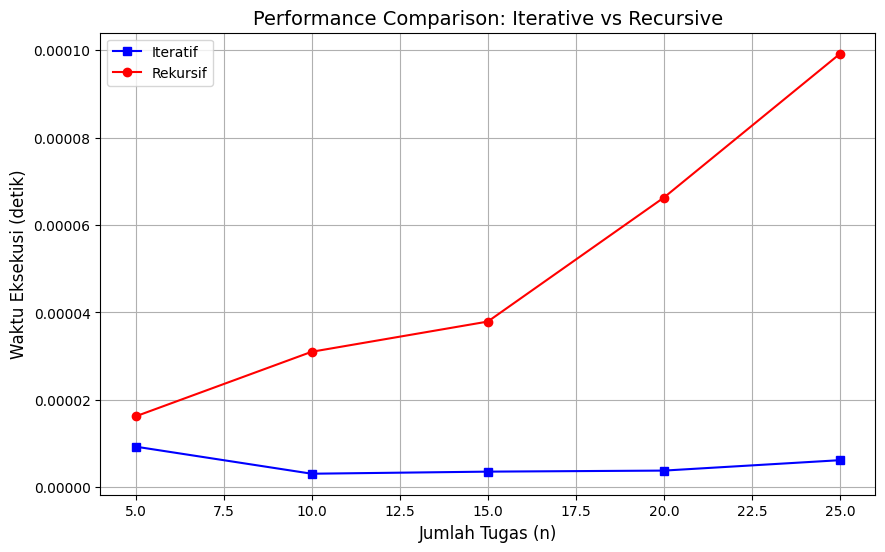

In [2]:
import time
import matplotlib.pyplot as plt
from prettytable import PrettyTable

# Fungsi iteratif untuk menentukan prioritas berdasarkan durasi tugas
def iterative_priority(tasks):
    return sorted(tasks, key=lambda x: x[1])  # Mengurutkan berdasarkan durasi (ascending)

# Fungsi rekursif untuk menentukan prioritas berdasarkan durasi tugas
def recursive_priority(tasks, sorted_tasks=None):
    if sorted_tasks is None:
        sorted_tasks = []
    if not tasks:  # Jika semua tugas telah diurutkan
        return sorted_tasks
    # Cari tugas dengan durasi minimum
    min_task = min(tasks, key=lambda x: x[1])
    sorted_tasks.append(min_task)
    tasks.remove(min_task)
    return recursive_priority(tasks, sorted_tasks)

# Simulasi perbandingan waktu eksekusi
task_sizes = [5, 10, 15, 20, 25]
iterative_times = []
recursive_times = []

for size in task_sizes:
    test_tasks = [("Tugas" + str(i), i) for i in range(size, 0, -1)]

    # Iteratif
    start_time = time.time()
    iterative_priority(test_tasks[:])
    iterative_times.append(time.time() - start_time)

    # Rekursif
    start_time = time.time()
    recursive_priority(test_tasks[:])
    recursive_times.append(time.time() - start_time)

# Membuat tabel hasil
table = PrettyTable()
table.field_names = ["n", "Recursive Time (s)", "Iterative Time (s)"]

for i in range(len(task_sizes)):
    table.add_row([task_sizes[i], f"{recursive_times[i]:.8f}", f"{iterative_times[i]:.8f}"])

print(table)

# Membuat grafik perbandingan
plt.figure(figsize=(10, 6))
plt.plot(task_sizes, iterative_times, label="Iteratif", marker='s', color='blue')
plt.plot(task_sizes, recursive_times, label="Rekursif", marker='o', color='red')
plt.title("Performance Comparison: Iterative vs Recursive", fontsize=14)
plt.xlabel("Jumlah Tugas (n)", fontsize=12)
plt.ylabel("Waktu Eksekusi (detik)", fontsize=12)
plt.legend()
plt.grid()
plt.show()
